In [103]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv', infer_datetime_format=True)

d = dtale.show(df)
d.open_browser()

In [99]:
d.open_browser()

In [104]:
df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [111]:
import requests
import pandas as pd

url = 'https://api.census.gov/data/2017/acs/acs5'
params = {
    'get': 'B01001_001E',
    'for': 'county:001',
    'in': 'state:01'
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data[1:], columns=data[0])

df['B01001_001E'] = df['B01001_001E'].astype(int)

df.set_index('county', inplace=True)

df = df.rename(columns={'B01001_001E':'Population'})

df

,Population,state
county,,
001,55036,01


In [110]:
data

[['B01001_001E', 'state', 'county'], ['55036', '01', '001']]

In [123]:
import requests
import pandas as pd

# Set the API endpoint and parameters
url = 'https://api.census.gov/data/2017/acs/acs5'
params = {
    'get': 'B01001_001E',
    'for': 'county:*',
    'in': 'state:*'
}

# Send a request to the API and retrieve the data
response = requests.get(url, params=params)
data = response.json()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Convert the population column to integers
df['B01001_001E'] = df['B01001_001E'].astype(int)

# Convert the state and county FIPS codes to strings and concatenate them
df['FIPS'] = df['state'].astype(str).str.zfill(2) + df['county'].astype(str).str.zfill(3)

# Rename the population column to 'Population'
df = df.rename(columns={'B01001_001E': 'Population'})

# Set the 'FIPS' column as the index
df = df.set_index('FIPS')

# Print the first 10 rows of the DataFrame
print(df.head(10))

       Population state county
FIPS                          
40045        4102    40    045
40051       54351    40    051
40119       80634    40    119
40125       71614    40    125
40037       70899    40    037
40141        7591    40    141
40149       11550    40    149
40033        6000    40    033
40075        9127    40    075
40079       49860    40    079


In [127]:
df.index.sort_values()

Index(['01001', '01003', '01005', '01007', '01009', '01011', '01013', '01015',
       '01017', '01019',
       ...
       '72135', '72137', '72139', '72141', '72143', '72145', '72147', '72149',
       '72151', '72153'],
      dtype='object', name='FIPS', length=3220)

In [6]:
from census import utils
import pandas as pd

In [35]:
data = pd.concat(list(utils.get_census_data('B01001_001E', 'population', 2017, 2021)))
data

,population,state,county,fips,date
0,4102,40,045,40045,2017-01-01
1,54351,40,051,40051,2017-01-01
2,80634,40,119,40119,2017-01-01
3,71614,40,125,40125,2017-01-01
4,70899,40,037,40037,2017-01-01
...,...,...,...,...,...
3216,14572,27,129,27129,2020-01-01
3217,15259,27,135,27135,2020-01-01
3218,96015,27,141,27141,2020-01-01
3219,36710,27,147,27147,2020-01-01


In [17]:
data = data[data['fips'] == 1001][['date','population']].set_index('date')


,population
date,
2017-01-01,55036
2018-01-01,55200
2019-01-01,55380
2020-01-01,55639


In [25]:
import numpy as np

data.resample('M').sum().replace(0, np.nan).interpolate('linear')

,population
date,
2017-01-31,55036.000000
2017-02-28,55049.666667
2017-03-31,55063.333333
2017-04-30,55077.000000
2017-05-31,55090.666667
2017-06-30,55104.333333
2017-07-31,55118.000000
2017-08-31,55131.666667
2017-09-30,55145.333333


In [33]:
census_data = pd.read_csv('data/census_starter.csv')
train = pd.read_csv('data/train.csv').rename(columns={'first_day_of_month':'date'})
test = pd.read_csv('data/test.csv')

In [34]:
train

,row_id,cfips,county,state,date,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [32]:
test

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01


In [3]:
import numpy as np
import pandas as pd
import os
os.listdir()

['.DS_Store',
 'nb.ipynb',
 '__init__.py',
 '__pycache__',
 'data_cleaning.py',
 'model.py',
 'census',
 'data']

In [4]:
df = pd.read_csv('data/test.csv')

In [5]:
df

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01


In [17]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = "https://api.census.gov/data/2018/abscs"
params = {
    "get": "GEO_ID,NAME,NAICS2017_LABEL,EMP,EMP_F,EMP_N,ESTAB,ESTAB_F,ESTAB_N",
    "for": "county:*",
    "in": "state:*",
    "key": "0fb360338440ce44424a0e782480c309cb8fbf6e"
}

# Send the API request and get the data
response = requests.get(url, params=params)
data = response.json()

print(data)


JSONDecodeError: [Errno Expecting value] error: unknown/unsupported geography heirarchy: 0

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')

print(df)

                  row_id  cfips          county    state first_day_of_month  \
0        1001_2019-08-01   1001  Autauga County  Alabama         2019-08-01   
1        1001_2019-09-01   1001  Autauga County  Alabama         2019-09-01   
2        1001_2019-10-01   1001  Autauga County  Alabama         2019-10-01   
3        1001_2019-11-01   1001  Autauga County  Alabama         2019-11-01   
4        1001_2019-12-01   1001  Autauga County  Alabama         2019-12-01   
...                  ...    ...             ...      ...                ...   
122260  56045_2022-06-01  56045   Weston County  Wyoming         2022-06-01   
122261  56045_2022-07-01  56045   Weston County  Wyoming         2022-07-01   
122262  56045_2022-08-01  56045   Weston County  Wyoming         2022-08-01   
122263  56045_2022-09-01  56045   Weston County  Wyoming         2022-09-01   
122264  56045_2022-10-01  56045   Weston County  Wyoming         2022-10-01   

        microbusiness_density  active  
0          

AxesSubplot(0.125,0.125;0.775x0.755)


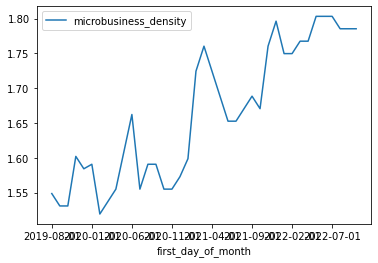

In [20]:
data = df[df['cfips'] == 56045]

print(data[['first_day_of_month','microbusiness_density']].set_index("first_day_of_month").plot())